In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
X_train = pd.read_csv("datasets/train_data.csv")
X_test = pd.read_csv("datasets/test_data.csv")

In [3]:
weights = {
    'count_deposit': +2,
    'count_borrow': -1,
    'count_repay': +3,
    'count_withdraw': -1,
    'count_liquidation': -5,
    'avg_deposit': +2,
    'avg_borrow': -1,
    'avg_repay': +3,
    'avg_withdraw': -1,
    'withdraw_to_depo': -2,
    'borrow_to_deposit': -2,
    'repay_to_borrow': +4,
}


In [4]:
X_train.columns

Index(['index', 'count_deposit', 'count_borrow', 'count_repay',
       'count_withdraw', 'count_liquidation', 'avg_deposit', 'avg_borrow',
       'avg_repay', 'avg_withdraw', 'withdraw_to_depo', 'borrow_to_deposit',
       'repay_to_borrow'],
      dtype='object')

In [5]:
import pandas as pd

X_train["credit_score_raw"] = X_train[list(weights)].dot(pd.Series(weights))
X_test["credit_score_raw"] = X_test[list(weights)].dot(pd.Series(weights))

combined_scores = pd.concat([X_train["credit_score_raw"], X_test["credit_score_raw"]])

_, bin_edges = pd.qcut(combined_scores, q=10, retbins=True, labels=False, duplicates='drop')

y_train = pd.cut(X_train["credit_score_raw"], bins=bin_edges, labels=[0,1,2,3,4,5,6,7,8,9], include_lowest=True)
y_test = pd.cut(X_test["credit_score_raw"], bins=bin_edges, labels=[0,1,2,3,4,5,6,7,8,9], include_lowest=True)

In [6]:
y_train

0       8
1       5
2       9
3       1
4       0
       ..
2792    8
2793    9
2794    5
2795    1
2796    7
Name: credit_score_raw, Length: 2797, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [7]:
X_train_final = X_train.drop("credit_score_raw", axis="columns")
X_test_final = X_test.drop("credit_score_raw", axis="columns")

In [8]:
X_train_final.head()

,index,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
0,350,0.077859,0.065,0.034364,0.000561,0.0,1.177242e-04,1.467826e-04,0.000180,0.000276,5.356467e-11,0.386785,0.833329
1,1846,0.004866,0.000,0.000000,0.000000,0.0,2.064671e-07,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,2492,0.002433,0.005,0.003436,0.000070,0.0,2.708800e-03,7.017656e-04,0.000748,0.002501,8.444252e-11,0.197825,0.940295
3,1518,0.002433,0.005,0.000000,0.000000,0.0,1.965094e-08,1.711823e-09,0.000000,0.000000,0.000000e+00,0.066517,0.000000
4,1064,0.000000,0.000,0.000000,0.000631,0.0,0.000000e+00,0.000000e+00,0.000000,0.000190,4.092952e-01,0.000000,0.000000


In [9]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_final, y_train)

C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
from sklearn.metrics import classification_report
y_pred = model_log.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.90      0.42      0.57        64
           2       0.21      0.36      0.27        66
           3       0.18      0.15      0.17        71
           4       0.16      0.49      0.25        63
           5       0.00      0.00      0.00        76
           6       0.27      0.06      0.10        69
           7       0.85      0.77      0.81        81
           8       0.85      0.70      0.77        81
           9       0.75      0.93      0.83        67

    accuracy                           0.48       700
   macro avg       0.50      0.48      0.47       700
weighted avg       0.51      0.48      0.47       700



C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [11]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train_final, y_train)
# test accuracy
y_pred = model_xg.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.95      0.81      0.87        64
           2       0.98      0.98      0.98        66
           3       0.99      1.00      0.99        71
           4       0.98      0.94      0.96        63
           5       0.97      0.97      0.97        76
           6       0.83      0.91      0.87        69
           7       0.89      0.90      0.90        81
           8       0.90      0.88      0.89        81
           9       0.91      0.93      0.92        67

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700



In [12]:
# train accuracy
y_pred_train = model_xg.predict(X_train_final)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       286
           2       1.00      1.00      1.00       283
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       287
           5       1.00      1.00      1.00       273
           6       1.00      1.00      1.00       281
           7       1.00      1.00      1.00       268
           8       1.00      1.00      1.00       269
           9       1.00      1.00      1.00       283

    accuracy                           1.00      2797
   macro avg       1.00      1.00      1.00      2797
weighted avg       1.00      1.00      1.00      2797



In [13]:
best_model = model_xg

In [14]:
feature_imp = best_model.feature_importances_
feature_imp

array([0.0031093 , 0.1481244 , 0.19292036, 0.05941857, 0.04964342,
       0.0255356 , 0.1306897 , 0.03619611, 0.01535597, 0.01072121,
       0.06549847, 0.08971562, 0.17307131], dtype=float32)

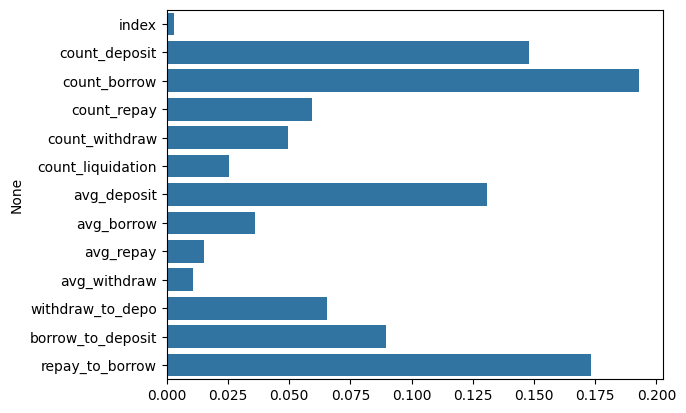

In [15]:
sns.barplot(y=X_train_final.columns, x=feature_imp)
plt.show()

In [16]:
# from joblib import dump
# dump(best_model, "artifacts/model.joblib")

In [17]:
# final_cols = X_train_final.columns.to_list()
# dump(final_cols, "artifacts/final_col.joblib")

In [18]:
y_proba = best_model.predict_proba(X_train_final)
quantile_to_score = [i * 100 for i in range(0, 10)]
expected_scores = y_proba @ quantile_to_score
wallet_scores = pd.DataFrame({
    "score": expected_scores
})

In [19]:
scores = wallet_scores.get("score")

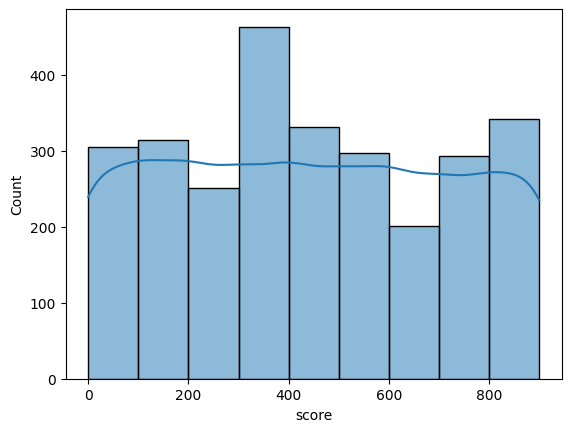

In [20]:
sns.histplot(scores, binwidth=100, kde=True)
plt.show()

In [21]:

# # Sample scores (replace this with your actual score series)

# # Define score bins and labels
# bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
# labels = ['0–100', '101–200', '201–300', '301–400', '401–500', 
#           '501–600', '601–700', '701–800', '801–900']

# # Cut the scores into bins
# score_ranges = pd.cut(scores, bins=bins, labels=labels, include_lowest=True, right=True)

# # Count wallets in each range
# distribution = score_ranges.value_counts().sort_index()

# # Create the final table
# distribution_df = pd.DataFrame({
#     "Score Range": labels,
#     "Number of Wallets": distribution.values
# })

# # Print markdown-style table
# print("| Score Range | Number of Wallets |")
# print("|-------------|--------------------|")
# for index, row in distribution_df.iterrows():
#     print(f"| {row['Score Range']} | {row['Number of Wallets']:>18} |")
